# Data Wrangling & Data Cleaning

[Data wrangling](https://en.wikipedia.org/wiki/Data_wrangling) is the process of converting raw data into a cleaner, more usable format for downstream purposes such as analytics, machine learning, and location intelligence. This notebook demonstrates general high level concepts around data cleaning/wrangling (expanding on this [post](https://www.placedata.net/posts/data-basics/)), some common use cases, and how to do certain munging tasks with Pandas. It also introduces key Pandas concepts around grouping data and plotting using the Matplotlib library.

<br>
<br>

### Types of Variables

In the world of data analytics, statistics, and machine learning, when people refer to variables they typically are referring to the types of information found in columns. The words variables, columns, or features can be used interchangeably. 

To demostrate different types of variables we can import data from, we will import a CSV from the Buzzfeed News [github repo](https://github.com/BuzzFeedNews).

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/andrea-ballatore/open-geo-data-education/main/datasets/world_bank_country_indicators_2000_2020/indicators_by_year/world_bank_indicators_countries-2019.csv'

df = pd.read_csv(url)

# What is the shape (size) of the dataset?

Usually one of the first things you want to know about a dataset is it's size – how many rows and columns – the **.shape** method allows you to see this in Pandas

In [3]:
df.shape

(241, 29)

In [4]:
df.head()

,iso_a2,iso_a3,name,name_long,abbrev,type,continent,region_un,subregion,region_wb,...,ny.gdp.mktp.cd,ny.gdp.mktp.pp.cd,sl.isv.ifrm.zs,sp.pop.grow,sp.pop.totl,sp.rur.totl.zs,sp.urb.totl.in.zs,region,income_group,eu
0,-99,-99,Indian Ocean Ter.,Indian Ocean Territories,Ind. Oc. Ter.,Dependency,Asia,Seven seas (open ocean),Seven seas (open ocean),East Asia & Pacific,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-99,-99,N. Cyprus,Northern Cyprus,N. Cy.,Sovereign country,Asia,Asia,Western Asia,Europe & Central Asia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-99,-99,Ashmore and Cartier Is.,Ashmore and Cartier Islands,A.C.Is.,Dependency,Oceania,Oceania,Australia and New Zealand,East Asia & Pacific,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-99,-99,Siachen Glacier,Siachen Glacier,Siachen,Indeterminate,Asia,Asia,Southern Asia,South Asia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-99,-99,Somaliland,Somaliland,Solnd.,Indeterminate,Africa,Africa,Eastern Africa,Sub-Saharan Africa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Are there missing values?

**.isna()** answers the question – how many NULL values (NULL is the default value of missing datapoints) are there in the dataset. 

In [81]:
# count of missing values by column
df.isna().sum()

# determine the percentage of missing values
df.isna().sum() / df.shape[0]

iso_a2               0.004149
iso_a3               0.000000
name                 0.000000
name_long            0.000000
abbrev               0.000000
type                 0.000000
continent            0.000000
region_un            0.000000
subregion            0.000000
region_wb            0.000000
un_a3                0.000000
wb_a2                0.004149
wb_a3                0.000000
iso3c                0.112033
country              0.112033
date                 0.112033
it.net.user.zs       0.141079
ms.mil.xpnd.gd.zs    0.385892
ne.trd.gnfs.zs       0.344398
ny.gdp.mktp.cd       0.000000
ny.gdp.mktp.pp.cd    0.232365
sl.isv.ifrm.zs       0.887967
sp.pop.grow          0.116183
sp.pop.totl          0.116183
sp.rur.totl.zs       0.124481
sp.urb.totl.in.zs    0.124481
region               0.112033
income_group         0.112033
eu                   0.883817
year                 0.000000
dtype: float64

# How to handle missing data

**.notnull()** is a function that returns a Series of True / False values that are True if a datapoint is available and False if it's missing. Therefore this function can be used to filter out all missing values for a given column.

In [82]:
# Filter missing values from a given column
df[df['ms.mil.xpnd.gd.zs'].notnull()].head()

,iso_a2,iso_a3,name,name_long,abbrev,type,continent,region_un,subregion,region_wb,...,ny.gdp.mktp.pp.cd,sl.isv.ifrm.zs,sp.pop.grow,sp.pop.totl,sp.rur.totl.zs,sp.urb.totl.in.zs,region,income_group,eu,year
7,AF,AFG,Afghanistan,Afghanistan,Afg.,Sovereign country,Asia,Asia,Southern Asia,South Asia,...,8.203398e+10,NaN,2.311817,38041754.0,74.246,25.754,South Asia,Low income,NaN,2019
10,AL,ALB,Albania,Albania,Alb.,Sovereign country,Europe,Europe,Southern Europe,Europe & Central Asia,...,4.137472e+10,32.240002,-0.426007,2854191.0,38.771,61.229,Europe & Central Asia,Upper middle income,NaN,2019
11,AM,ARM,Armenia,Armenia,Arm.,Sovereign country,Asia,Asia,Western Asia,Europe & Central Asia,...,4.217122e+10,NaN,0.201540,2957731.0,36.781,63.219,Europe & Central Asia,Upper middle income,NaN,2019
12,AO,AGO,Angola,Angola,Ang.,Sovereign country,Africa,Africa,Middle Africa,Sub-Saharan Africa,...,2.216795e+11,NaN,3.242983,31825295.0,33.823,66.177,Sub-Saharan Africa,Lower middle income,NaN,2019
14,AR,ARG,Argentina,Argentina,Arg.,Sovereign country,South America,Americas,South America,Latin America & Caribbean,...,1.035401e+12,49.360001,0.993397,44938712.0,8.009,91.991,Latin America & Caribbean,Upper middle income,NaN,2019


Similarly, the **.dropna()** function drops all missing values from a dataframe. More useful is the ability to drop specific columns by using the **subset** argument.

In [83]:
# Using dropna to drop missing values from a specific column
df.dropna(subset=['ms.mil.xpnd.gd.zs']).head()

,iso_a2,iso_a3,name,name_long,abbrev,type,continent,region_un,subregion,region_wb,...,ny.gdp.mktp.pp.cd,sl.isv.ifrm.zs,sp.pop.grow,sp.pop.totl,sp.rur.totl.zs,sp.urb.totl.in.zs,region,income_group,eu,year
7,AF,AFG,Afghanistan,Afghanistan,Afg.,Sovereign country,Asia,Asia,Southern Asia,South Asia,...,8.203398e+10,NaN,2.311817,38041754.0,74.246,25.754,South Asia,Low income,NaN,2019
10,AL,ALB,Albania,Albania,Alb.,Sovereign country,Europe,Europe,Southern Europe,Europe & Central Asia,...,4.137472e+10,32.240002,-0.426007,2854191.0,38.771,61.229,Europe & Central Asia,Upper middle income,NaN,2019
11,AM,ARM,Armenia,Armenia,Arm.,Sovereign country,Asia,Asia,Western Asia,Europe & Central Asia,...,4.217122e+10,NaN,0.201540,2957731.0,36.781,63.219,Europe & Central Asia,Upper middle income,NaN,2019
12,AO,AGO,Angola,Angola,Ang.,Sovereign country,Africa,Africa,Middle Africa,Sub-Saharan Africa,...,2.216795e+11,NaN,3.242983,31825295.0,33.823,66.177,Sub-Saharan Africa,Lower middle income,NaN,2019
14,AR,ARG,Argentina,Argentina,Arg.,Sovereign country,South America,Americas,South America,Latin America & Caribbean,...,1.035401e+12,49.360001,0.993397,44938712.0,8.009,91.991,Latin America & Caribbean,Upper middle income,NaN,2019


# Are the variables the correct data type?

<img src="https://thefactfactor.com/wp-content/uploads/2019/06/Variables.png">

- Ordinal is a category that has an inherent ordering
- Nominal has no order
- Continous numeric values can take any real number from zero - infinity
- Descrete values have set intervals – e.g. years like 2019, 2020, 2021, you cannot have 2020.5

In [84]:
# To list datatypes of the DataFrame
df.dtypes

iso_a2                object
iso_a3                object
name                  object
name_long             object
abbrev                object
type                  object
continent             object
region_un             object
subregion             object
region_wb             object
un_a3                  int64
wb_a2                 object
wb_a3                 object
iso3c                 object
country               object
date                 float64
it.net.user.zs       float64
ms.mil.xpnd.gd.zs    float64
ne.trd.gnfs.zs       float64
ny.gdp.mktp.cd        object
ny.gdp.mktp.pp.cd    float64
sl.isv.ifrm.zs       float64
sp.pop.grow          float64
sp.pop.totl          float64
sp.rur.totl.zs       float64
sp.urb.totl.in.zs    float64
region                object
income_group          object
eu                    object
year                   int64
dtype: object

# How to change data types

In [85]:
# How to change datatype of a given column
df['ny.gdp.mktp.cd'] = df['ny.gdp.mktp.cd'].astype(str)

# Population vs Sample – how to slice and dice data

Indexing, slicing, and filtering data is the ability to filter datapoints according to certain conditions. For example, to filter out only rows in the DataFrame that are in 'Europe':

In [25]:
df1 = df[df['continent'] == 'Europe']

You can also add multiple filtering conditions by wrapping conditional statements in parentheses () and seperating with '&'

In [86]:
df2 = df[(df['continent'] != 'Africa') & (df['type'] != 'Sovereign country')]

In [87]:
df2.head()

,iso_a2,iso_a3,name,name_long,abbrev,type,continent,region_un,subregion,region_wb,...,ny.gdp.mktp.pp.cd,sl.isv.ifrm.zs,sp.pop.grow,sp.pop.totl,sp.rur.totl.zs,sp.urb.totl.in.zs,region,income_group,eu,year
0,-99,-99,Indian Ocean Ter.,Indian Ocean Territories,Ind. Oc. Ter.,Dependency,Asia,Seven seas (open ocean),Seven seas (open ocean),East Asia & Pacific,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
2,-99,-99,Ashmore and Cartier Is.,Ashmore and Cartier Islands,A.C.Is.,Dependency,Oceania,Oceania,Australia and New Zealand,East Asia & Pacific,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
3,-99,-99,Siachen Glacier,Siachen Glacier,Siachen,Indeterminate,Asia,Asia,Southern Asia,South Asia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
9,AI,AIA,Anguilla,Anguilla,Ang.,Dependency,North America,Americas,Caribbean,Latin America & Caribbean,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
13,AQ,ATA,Antarctica,Antarctica,Ant.,Indeterminate,Antarctica,Antarctica,Antarctica,Antarctica,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


# Grouping data

Splitting a data set into various subsets or groupings and applying a function to each group, whether determining statistics for each group, or applying an arbitrary function, is often a critical component of a data analysis workflow. In Pandas, and many other data analysis tools, there is a concept called *'split-apply-combine'* that descibes the operations of grouping / splitting data, aggregating / applying some statistical operation, and then combine the result into a DataFrame or Series. In the first stage of the process, data contained in a pandas DataFrame is split into groups based on one or more *keys* that you provide. The splitting can be performed row-wise or column-wise. For example, a DataFrame can be grouped on its rows (axis=0) or its columns (axis=1). Once this is done, a function is applied to each group (e.g. **.mean()** to learn the average of each group), producing a new value. Finally, the results of all those function applications are com-bined into a result object, often a new DataFrame.

<img src="../static/img/pd_grouping.png" width="50%">

<br>
<br>

For example, to count the number of Country types in each sub-region in our dataset

In [55]:
temp = df.groupby(['subregion', 'type'])['name'].count().reset_index()

In [57]:
temp.head()

,subregion,type,name
0,Antarctica,Indeterminate,1
1,Australia and New Zealand,Country,2
2,Australia and New Zealand,Dependency,2
3,Caribbean,Country,3
4,Caribbean,Dependency,9


# Export data

Exporting data is easy using the **.to_csv()** function.

In [58]:
temp.to_csv('testfile.csv')

# How to combine dataframes

In [59]:
url = 'https://raw.githubusercontent.com/andrea-ballatore/open-geo-data-education/main/datasets/world_bank_country_indicators_2000_2020/indicators_by_year/world_bank_indicators_countries-2018.csv'

df3 = pd.read_csv(url)

In [60]:
df3.shape

(241, 34)

In [63]:
df['year'] = 2019
df3['year'] = 2018

temp = pd.concat([df, df3])

In [89]:
temp.shape
temp.head(1)

,iso_a2,iso_a3,name,name_long,abbrev,type,continent,region_un,subregion,region_wb,...,ny.gdp.mktp.pp.cd,sl.isv.ifrm.zs,sp.pop.grow,sp.pop.totl,sp.rur.totl.zs,sp.urb.totl.in.zs,region,income_group,eu,year
168,OM,OMN,Oman,Oman,Oman,Sovereign country,Asia,Asia,Western Asia,Middle East & North Africa,...,1.418243e+11,NaN,2.968313,4974986.0,14.557,85.443,Middle East & North Africa,High income,NaN,2019


In [69]:
temp['ms.mil.xpnd.gd.zs'].loc[temp['year']==2018] - temp['ms.mil.xpnd.gd.zs'].loc[temp['year']==2019]

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
236   -0.026366
237         NaN
238    0.020922
239    0.213464
240    0.524194
Name: ms.mil.xpnd.gd.zs, Length: 241, dtype: float64

# How to do simple visuals in Pandas / Python

Visualizing data is easy in Python with the Matplotlib library. To create a horizontal bar chart you can use the **.barh** object, and provide values for the X and Y axis. In this case the values are the columns you want to plot from our DataFrame.

In [71]:
import matplotlib.pyplot as plt

<BarContainer object of 10 artists>

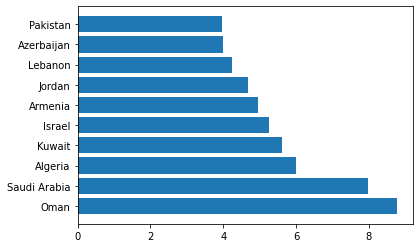

In [74]:
temp = df.sort_values(by='ms.mil.xpnd.gd.zs', ascending=False)[:10]

plt.barh(temp['name'], temp['ms.mil.xpnd.gd.zs'])

There is a similar logic to create a scatter plot using the **.scatter** object.

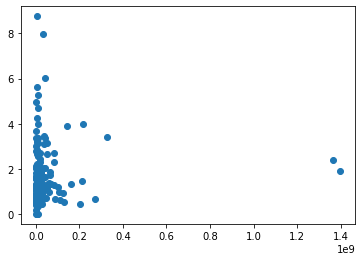

In [80]:
plt.scatter(df['sp.pop.totl'], df['ms.mil.xpnd.gd.zs'])